# Initial EDA on the Dataset.

# Dataset - TIPSTER Summac 

This dataset consists of scientific research papers which appeared in Association for Computational Linguistics (ACL) sponsored conferences.

In [1]:
!pip install --upgrade pandas
!pip install --upgrade numpy


  Attempting uninstall: pandas
    Found existing installation: pandas 1.0.5
    Uninstalling pandas-1.0.5:
      Successfully uninstalled pandas-1.0.5
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5


ERROR: tensorflow 2.3.1 has requirement numpy<1.19.0,>=1.16.0, but you'll have numpy 1.20.3 which is incompatible.
ERROR: tensorflow 2.3.1 has requirement tensorflow-estimator<2.4.0,>=2.3.0, but you'll have tensorflow-estimator 2.4.0 which is incompatible.
ERROR: csvmatch 1.20 has requirement tqdm==4.18.0, but you'll have tqdm 4.53.0 which is incompatible.


In [2]:
drive = 'cmplg-xml'
import glob
files = glob.glob(drive+'/*.xml')

import pandas as pd
from bs4 import BeautifulSoup

def Split_Data(file):
  soup = BeautifulSoup(open(file),'xml')
  a = soup.find('ABSTRACT').text
  b =  soup.get_text()
  c = b.replace(a, '####')
  return c.split('####')[1], a


def Dataset(files, fn):
  article = []
  summary = []
  for file in files:
    a, b = fn(file)
    article.append(a)
    summary.append(b)
  df = pd.DataFrame({'Articles':article, 'Summary':summary})
  return df

data = Dataset(files, Split_Data)

In [3]:
data

,Articles,Summary
0,\n\n Introduction \n\n The formalism of synch...,\n\nThe formalism of synchronous tree-adjoinin...
1,\n\n Introduction \n\nArguments for stacked X...,\n\nDependency grammar is usually interpreted ...
2,\n\n Introduction \n\nThis paper describes pa...,\n\nThe relationship between Lexical-Functiona...
3,\n\n Theoretical Background \n\nAs a prelimin...,\n\nWe present an analysis of the semantic int...
4,\n\n Introduction\n\n\nData sparseness is a...,\n\nIn many applications of natural language p...
...,...,...
173,\n\n Introduction \n\nWe address the problem ...,\n\nWe address the problem of automatically ac...
174,\n\n Introduction \n\nRecently various method...,\n\nWe address the problem of automatically co...
175,"\n\n Introduction \n\nIn this paper, we will ...",\n\nWe describe how substantial domain-indepen...
176,\n\n Introduction \n\nCategorial Grammar (CG)...,\n\nWe study the computational complexity of t...


# Data Cleaning



*   Removal of punctuations, stop-words, special-characters and numbers
*   Converting the text to lower-case
*   Tokenize the text
*   Lemmatize the tokens



In [4]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
len_of_articles = []
for article in data['Articles']:
  len_of_articles.append(len(word_tokenize(article)))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\saiis\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\saiis\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [5]:
len_of_highlights = []
for highlight in data['Summary']:
  len_of_highlights.append(len(word_tokenize(highlight)))

In [6]:
from statistics import mean
mean(len_of_highlights)

114.37640449438203

In [7]:
5093/114

44.675438596491226

In [8]:
#len(len_of_articles)

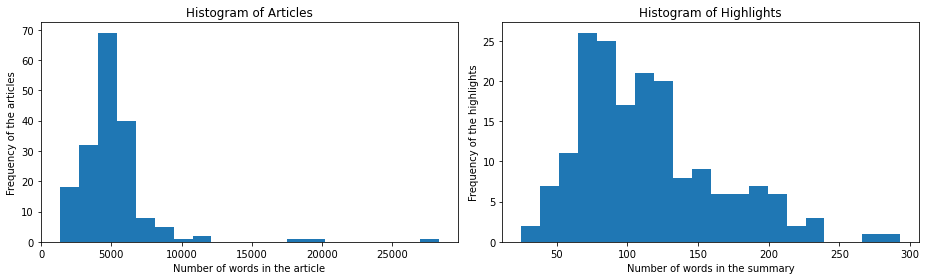

In [9]:
import matplotlib.pyplot as plt
_=fig, axs = plt.subplots(1, 2,sharex=False, sharey=False, figsize=(13,4), tight_layout=True)
# for i, ax in enumerate(axs.flat):
#     ax.hist()
#     ax.set_title(f'Title {i}')
# _=plt.xlabel("Number of Characters in the article")
# _=plt.ylabel("Frequency of the articles")
_=axs[0].hist(len_of_articles, bins=20)
_=axs[0].set_title("Histogram of Articles")
_=axs[0].set_xlabel("Number of words in the article")
_=axs[0].set_ylabel("Frequency of the articles")
_=axs[1].hist(len_of_highlights, bins=20)
_=axs[1].set_title("Histogram of Highlights")
_=axs[1].set_xlabel("Number of words in the summary")
_=axs[1].set_ylabel("Frequency of the highlights")
# _=fig.set_size_inches(20,9)
# _=fig.suptitle("Histogram of Article/Summary")
# _=axs.set_xlabel("Number of Characters in the article")
# _=axs.set_ylabel("Frequency of the articles")
# _=axs.set_title("Histogram of Article/Summary")

In [10]:
 articles = ''
for article in data['Articles'][:]:
  articles += article

I have used the NLTK module from python to clean my dataset.

In [11]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
# Download the puctuations
nltk.download('punkt')
# Download the stop-words
nltk.download('stopwords')
articles_processed = re.sub(re.compile('<.*?>'),'',articles)
articles_processed = re.sub('[^A-Za-z0-9]+',' ',articles_processed)
articles_processed = articles_processed.lower()
articles_tokens = word_tokenize(articles_processed)
stop_words= stopwords.words('english')
stop_words.extend(['from', 'mr', 'said','subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could', '_', 'be', 'know', 'good', 'go', 'get', 'do', 'done', '000'
'try', 'many', 'applause', 'one', 'year', 'some', 'nice', 'thank', 'think', 'see', 'rather', 'easy', 'easily', 'lot', 'lack', 'make', 'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come'])
filtered_articles = [word for word in articles_tokens if word not in stop_words]

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\saiis\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\saiis\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
len(articles)

5026826

In [13]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lemmatizer= WordNetLemmatizer()
lemm_articles = [lemmatizer.lemmatize(word) for word in filtered_articles]
lemm_articles.remove('000')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\saiis\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Topic Modeling

## NMF

In [14]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
vectorizer = TfidfVectorizer(max_features=10, min_df=1, stop_words='english')
X = vectorizer.fit_transform(lemm_articles)
idx_to_word = np.array(vectorizer.get_feature_names())
# apply NMF
nmf = NMF(n_components=20, solver="mu")
W = nmf.fit_transform(X)
H = nmf.components_

In [15]:
print("Topics:")
for i, topic in enumerate(H):
    print("Topic {}: {}".format(i + 1, ",".join([str(x) for x in idx_to_word [topic.argsort()[-10:]]])))

Topics:
Topic 1: example,grammar,model,rule,sentence,set,structure,word,used,language
Topic 2: grammar,rule,set,structure,used,word,example,model,sentence,language
Topic 3: grammar,language,model,rule,sentence,set,structure,used,example,word
Topic 4: example,grammar,language,model,rule,set,used,word,structure,sentence
Topic 5: example,grammar,language,rule,sentence,set,structure,used,model,word
Topic 6: language,model,rule,sentence,set,structure,used,word,grammar,example
Topic 7: example,grammar,language,model,rule,set,structure,word,sentence,used
Topic 8: example,language,model,rule,sentence,word,used,grammar,set,structure
Topic 9: grammar,language,rule,sentence,set,used,word,example,model,structure
Topic 10: example,grammar,language,model,set,structure,used,word,sentence,rule
Topic 11: example,grammar,language,model,sentence,set,word,used,structure,rule
Topic 12: example,grammar,model,rule,sentence,structure,used,word,language,set
Topic 13: grammar,language,model,sentence,set,structu

# Word Cloud


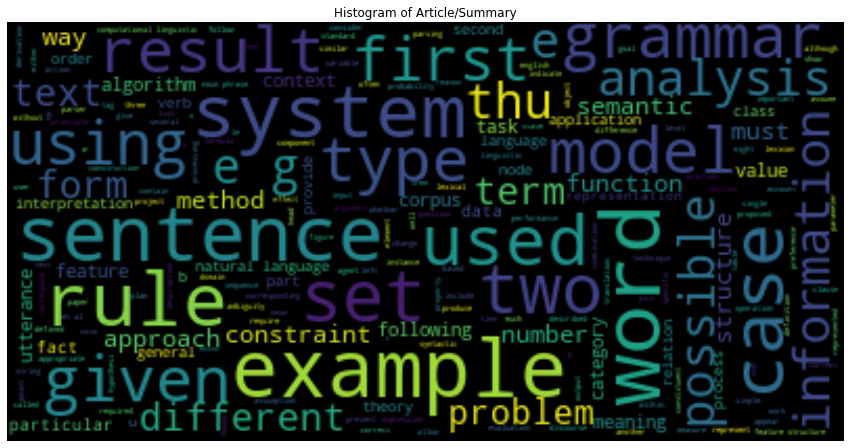

In [16]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# wordcloud = WordCloud().generate(cleaned)
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis("off")
# lower max_font_size
wordcloud = WordCloud(max_font_size=40).generate(' '.join(lemm_articles))
#print("Word-cloud for the Articles:" )


plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
fig = plt.gcf()
_=plt.title("Histogram of Article/Summary")
_=fig.set_size_inches(15,9)
plt.show()

In [17]:
!pip install pyLDAvis

# Topic Modeling - LDA

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import pyLDAvis.sklearn
lemm_articles.remove('000')
vectorizer = CountVectorizer(analyzer='word',       
                             min_df=1,                       
                             stop_words='english',             
                             lowercase=True,                   
                             token_pattern='[a-zA-Z0-9]{3,}',  
                             max_features=50          
                            )
data_vectorized = vectorizer.fit_transform(lemm_articles)
lda_model = LatentDirichletAllocation(n_components=10, # Number of topics
                                      learning_method='online',
                                      random_state=0,
                                      learning_decay=0.7,
                                      n_jobs = -1  # Use all available CPUs
                                     )
lda_output = lda_model.fit_transform(data_vectorized)

In [19]:
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
print("Topics for the articles :")
print_topics(lda_model,vectorizer,20)

Topics for the articles :

Topic #0:
rule form theory constraint class set using number order word sentence analysis model case different noun data interpretation structure semantic

Topic #1:
model structure case different interpretation relation set using number order word sentence analysis rule noun data form semantic theory information

Topic #2:
language lexical value function set using number order word sentence analysis case model rule different data noun structure interpretation form

Topic #3:
phrase verb given term set using number order word sentence analysis case model different rule noun data structure interpretation form

Topic #4:
word sentence set number using analysis order case model different rule noun data interpretation structure form semantic theory information example

Topic #5:
corpus data tree text discourse set using number order word sentence analysis case model different rule noun interpretation structure form

Topic #6:
based algorithm possible approach pro

In [20]:
import pandas as pd
lda_output = lda_model.transform(data_vectorized)
topicnames = ['Topic' + str(i) for i in range(lda_model.n_components)]
docnames = ['Doc' + str(i) for i in range(len(lemm_articles))]
df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=topicnames, index=docnames)
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic
def color_green(val):
    color = 'green' if val > .1 else 'black'
    return 'color: {col}'.format(col=color)
def make_bold(val):
    weight = 700 if val > .1 else 400
    return 'font-weight: {weight}'.format(weight=weight)
df_document_topics = df_document_topic.head(10).style.applymap(color_green).applymap(make_bold)
df_document_topics

,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9,dominant_topic
Doc0,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0
Doc1,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0
Doc2,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0
Doc3,0.050000,0.050000,0.050000,0.050000,0.050000,0.550000,0.050000,0.050000,0.050000,0.050000,5
Doc4,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0
Doc5,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.550000,9
Doc6,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0
Doc7,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0
Doc8,0.050000,0.050000,0.050000,0.050000,0.050000,0.550000,0.050000,0.050000,0.050000,0.050000,5
Doc9,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0


In [21]:
pyLDAvis.enable_notebook()
pyLDAvis.sklearn.prepare(lda_model, data_vectorized, vectorizer, mds='tsne')

C:\Users\saiis\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:57: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\saiis\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:349: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  error = np.finfo(np.float).max
C:\Users\saiis\anaconda3\lib\site-packages\sklearn

PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
4      32.420952   8.115230       1        1  14.000194
1       0.648955  71.707100       2        1  11.276157
7      71.019684   9.971006       3        1  10.269350
0       3.785981  33.185135       4        1  10.018394
6     -42.666500  -9.222070       5        1   9.634139
5      -3.621689 -43.526516       6        1   9.526905
2      -3.632402  -4.171708       7        1   9.224565
9     -36.584400  35.804413       8        1   9.197012
8      44.391380  50.615383       9        1   8.555099
3      40.235809 -31.591665      10        1   8.298184, topic_info=           Term         Freq        Total Category  logprob  loglift
33         rule  3295.000000  3295.000000  Default  30.0000  30.0000
20     language  2949.000000  2949.000000  Default  29.0000  29.0000
17      grammar  2648.000000  2648.000000  Default  28.0000  28.0000
49         word  2491.000000  2491.000000  Default  27.0000  27.0000
45         used  1976.000000  1976.000000  Default  26.0000  26.0000
..          ...          ...          ...      ...      ...      ...
38    structure     0.126312  1733.349357  Topic10 -10.6944  -7.0377
18  information     0.126312  1485.129704  Topic10 -10.6944  -6.8831
12      example     0.126312  1728.015176  Topic10 -10.6944  -7.0346
0     algorithm     0.126312  1221.016845  Topic10 -10.6944  -6.6873
8        corpus     0.126312  1484.515707  Topic10 -10.6944  -6.8827

[447 rows x 6 columns], token_table=      Topic      Freq            Term
term                                 
0         5  0.999167       algorithm
1         1  0.999281        analysis
2         5  0.999544        approach
3         5  0.998905           based
4         2  0.999422            case
5         4  0.999171           class
6         4  0.998302      constraint
7         8  0.999497         context
8         6  0.999653          corpus
9         6  0.999061            data
10        2  0.999505       different
11        6  0.999451       discourse
12        3  0.999413         example
13        8  0.999668         feature
14        4  0.998780            form
15        7  0.999395        function
16       10  0.999470           given
17        8  0.999829         grammar
18        3  0.999239     information
19        2  0.999028  interpretation
20        7  0.999706        language
21        7  0.999023         lexical
22        8  0.998655          method
23        2  0.999241           model
24        9  0.999423            node
25        3  0.999609            noun
26        1  0.999278          number
27        1  0.998389           order
28       10  0.999707          phrase
29        5  0.999334        possible
30        5  0.999023         problem
31        2  0.998857        relation
32        9  0.999475          result
33        4  0.999571            rule
34        5  0.998778         section
35        3  0.998999        semantic
36        1  0.999707        sentence
37        1  0.999282             set
38        2  0.999222       structure
39        9  0.999431            task
40       10  0.998835            term
41        6  0.998854            text
42        4  0.999186          theory
43        6  0.999152            tree
44        3  0.999412            type
45        9  0.999429            used
46        1  0.999198           using
47        7  0.998777           value
48       10  0.999330            verb
49        1  0.999800            word, R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 2, 8, 1, 7, 6, 3, 10, 9, 4])

In the above visualization, all the articles were divided into 10 clusters depending on the context of word relevant to each topic. The relevance measure (λ) defines how relevant each term is to the cluster. The higher the value of (λ), the term is more relevant to its cluster.

# Name-Entity Recognition

In [22]:
from nltk import pos_tag,ne_chunk
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
article_tags = ne_chunk(pos_tag(word_tokenize(articles)))

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\saiis\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\saiis\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\saiis\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


In [23]:
article_entities = []
for i in article_tags:
  if len(i) < 2:
    if 'NNP' in str(i) or 'NNPS' in str(i):
        article_entities.append(str(i))

In [24]:
from nltk.probability import FreqDist
article_freq_entities = FreqDist(article_entities)
article_freq_entities
article_keys = sorted(article_freq_entities.items(), key = lambda kv:(kv[1], kv[0]), reverse=True)
article_ent = []
article_freq_count = []
for i in article_keys:
  article_ent.append(i[0])
  article_freq_count.append(i[1])

In [25]:
import pandas as pd
article_words = []
article_entities = []
for i in article_ent:
  i = i.replace("/NNP)","")
  i = i.replace("(","")
  i = i.replace("/NNPS)","")
  article_words.append(i.split()[1])
  article_entities.append(i.split()[0])

article_entities_df = pd.DataFrame({'Keyword':article_words,'Entity':article_entities,'Frequency':article_freq_count})
article_entities_df
article_count = 0
article_total_count = article_entities_df['Frequency'].sum()
article_cumulative_frequency = []
article_cumulative_frequency_coverage = []
for i in range(article_entities_df.shape[0]):
  article_count = article_count+article_entities_df['Frequency'][i]
  article_cumulative_frequency.append(article_count)
  article_cumulative_frequency_coverage.append((article_count/article_total_count)*100)
article_entities_df['Cumulative Frequency'] = article_cumulative_frequency
article_entities_df['Cumulative Frequency Coverage'] = article_cumulative_frequency_coverage

Distribution of types of Entities


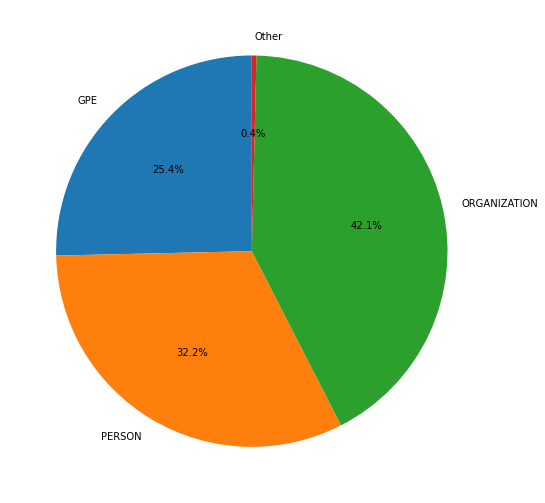

In [44]:
import matplotlib.pyplot as plt

a = list(article_entities_df['Entity'].unique())
b = []
for i in a:
    b.append(article_entities_df[article_entities_df['Entity'] == i]['Frequency'].sum())
new_lst = {}
low_lst = {}
for k in range(len(b)):
    n = b[k]
    n1 = (n/sum(b))*100
    if n1 < 10:
        low_lst[a[k]] = n1
    else:
        new_lst[a[k]] = n1

counter = 0
for item in low_lst:
    counter += low_lst[item]
new_lst['Other'] = counter
explode = (0,0,0,0.5)
print("Distribution of types of Entities")
plt.pie(new_lst.values(), labels=new_lst.keys(),autopct='%1.1f%%', startangle=90)
# article_pie_chart_entities_df.plot.pie(y='Frquencies')
_=fig=plt.gcf()
_=fig.set_size_inches(30,9)
#_=fig=plt.title('Distribution of types of Entities')
plt.show()